# Exploring the Dataset

Notebook 01 kicks things off by loading and getting familiar with the simulated cybersecurity event dataset. 

Here, we take a first look at the data: previewing the initial rows, checking the overall shape, and walking through the full schema. This early pass helps us understand what information we’re working with such as event metadata, network details, user and device context, MITRE technique mappings, and validation labels. 

By the end of this section, we have a solid grasp of the dataset’s structure and are ready to move into deeper analysis and feature exploration.

In [2]:
import pandas as pd # For data manipulation

# Path to generated dataset
df = pd.read_csv("../data/cyber_incidents_simulated.csv")

# Display the first few rows of the dataset
print(df.head())

# Separate output
print("\n" + "="*50 + "\n")

# Display information about the dataset
print(df.info())

   event_id            timestamp     log_source                   event_type  \
0         1  2024-11-10T08:26:19       firewall                      malware   
1         2  2024-07-13T09:48:02           siem                      malware   
2         3  2024-10-17T11:38:15  email_gateway                     phishing   
3         4  2024-12-25T12:44:39       firewall                 access_abuse   
4         5  2024-06-04T05:02:04       firewall  suspicious_network_activity   

   severity mitre_technique  \
0    medium       T1204.002   
1  critical           T1105   
2       low       T1566.002   
3    medium           T1021   
4       low           T1046   

                                        mitre_clause     user  \
0  This activity aligns with MITRE ATT&CK techniq...    leo.v   
1  This activity aligns with MITRE ATT&CK techniq...  karen.b   
2  This activity aligns with MITRE ATT&CK techniq...   eric.m   
3  This activity aligns with MITRE ATT&CK techniq...   eric.m   
4  This

## Key Distributions and Visual Analysis

This section provides a comprehensive overview of the major categorical variables in the dataset through both statistical summaries and visual representations.

**Visualizations include:**
- **Event type distribution**: Bar and pie charts showing the balance across incident categories
- **Severity levels**: Distribution from info to critical, reflecting realistic SOC triage priorities
- **Log sources**: Frequency of detection systems (EDR, firewall, email gateway, etc.)
- **True positive labels**: Ratio of confirmed threats vs. false positives
- **MITRE ATT&CK techniques**: Top techniques mapped to incidents for threat intelligence context

**Expected patterns:**
- Event types should be relatively balanced across all categories
- Severity levels should follow realistic distributions (more low/medium than critical)
- Log sources should reflect diverse detection capabilities
- True positive rate around 70-80% (realistic SOC alert quality)
- MITRE techniques should align with corresponding event types

These visualizations establish that the dataset is well-structured, balanced, and suitable for training a multi-class classification model.

Event Type Distribution:
event_type
policy_violation               56055
insider_threat                 51929
access_abuse                   51723
data_exfiltration              50234
benign_activity                50230
web_attack                     50104
suspicious_network_activity    49901
credential_compromise          47791
phishing                       46199
malware                        45834
Name: count, dtype: int64

Total unique event types: 10


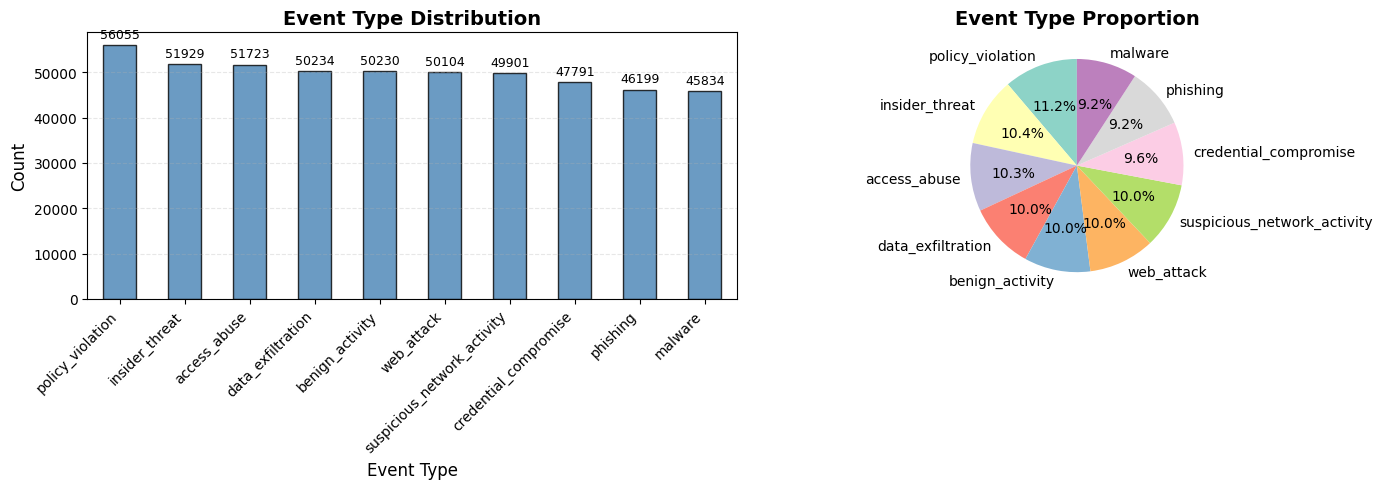



Severity Level Distribution:
severity
high        125761
medium      119312
critical     98835
low          89637
info         66455
Name: count, dtype: int64


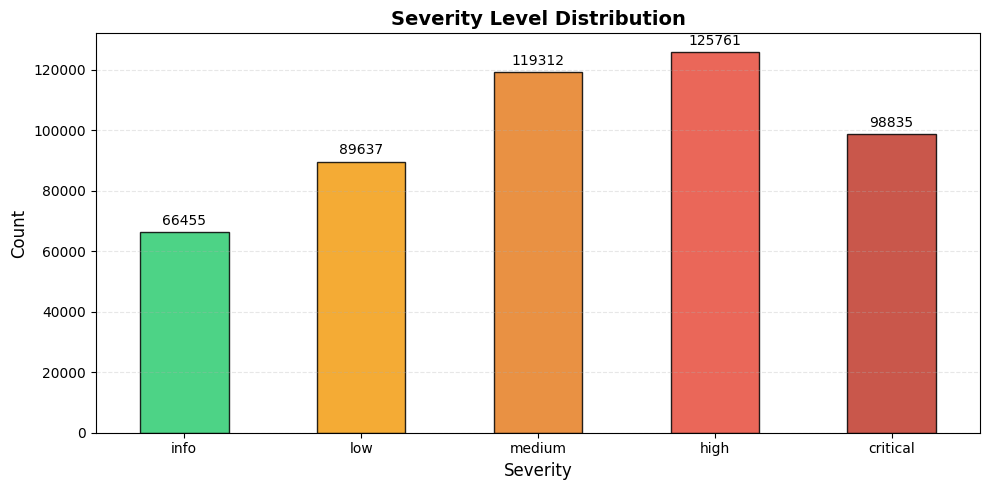



Log Source Distribution:
log_source
siem             141938
firewall          66927
proxy             58218
edr               58086
dlp               41567
idp               41286
email_gateway     16726
mfa_logs          12643
netflow           12574
waf               12556
ids               12552
vpn               12497
hr_system         12430
Name: count, dtype: int64


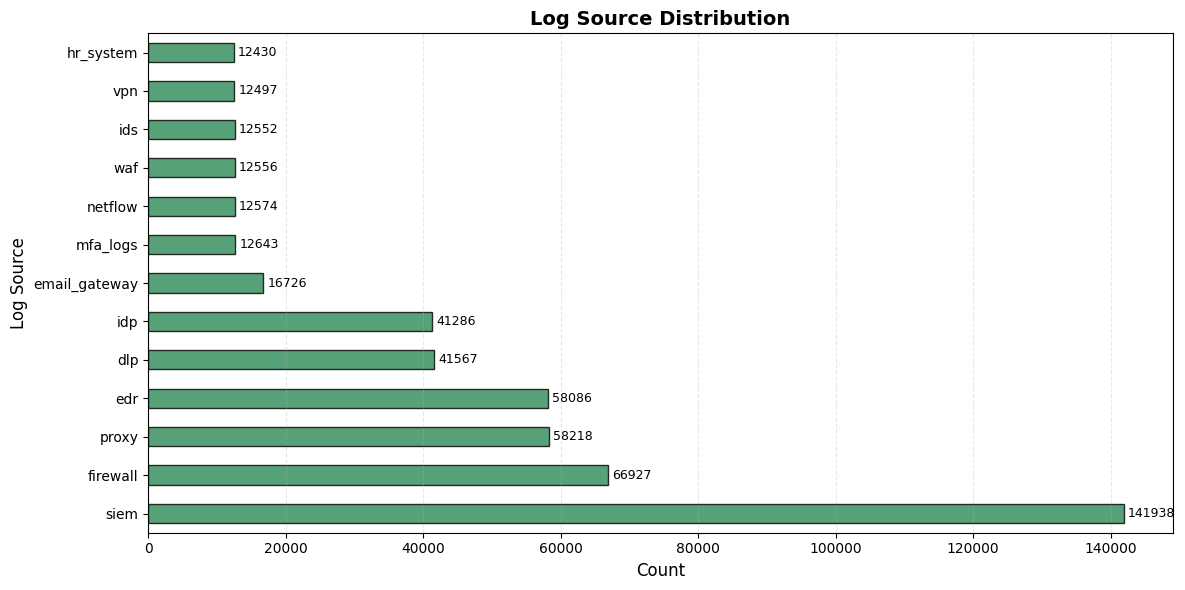



True Positive Label Distribution:
is_true_positive
1    311496
0    188504
Name: count, dtype: int64


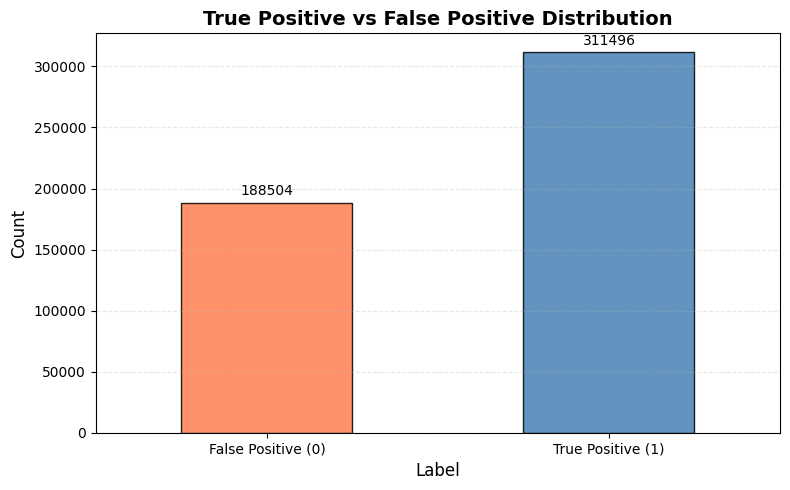



Top 15 MITRE Techniques:
mitre_technique
T1110        29076
T1078        28838
T1566.001    16784
T1566.002    16738
T1598        16684
T1021        16511
T1087        12702
T1041        12668
T1567.002    12658
T1190        12633
T1595        12626
T1110.001    12626
T1528        12623
T1052        12608
T1020        12566
Name: count, dtype: int64


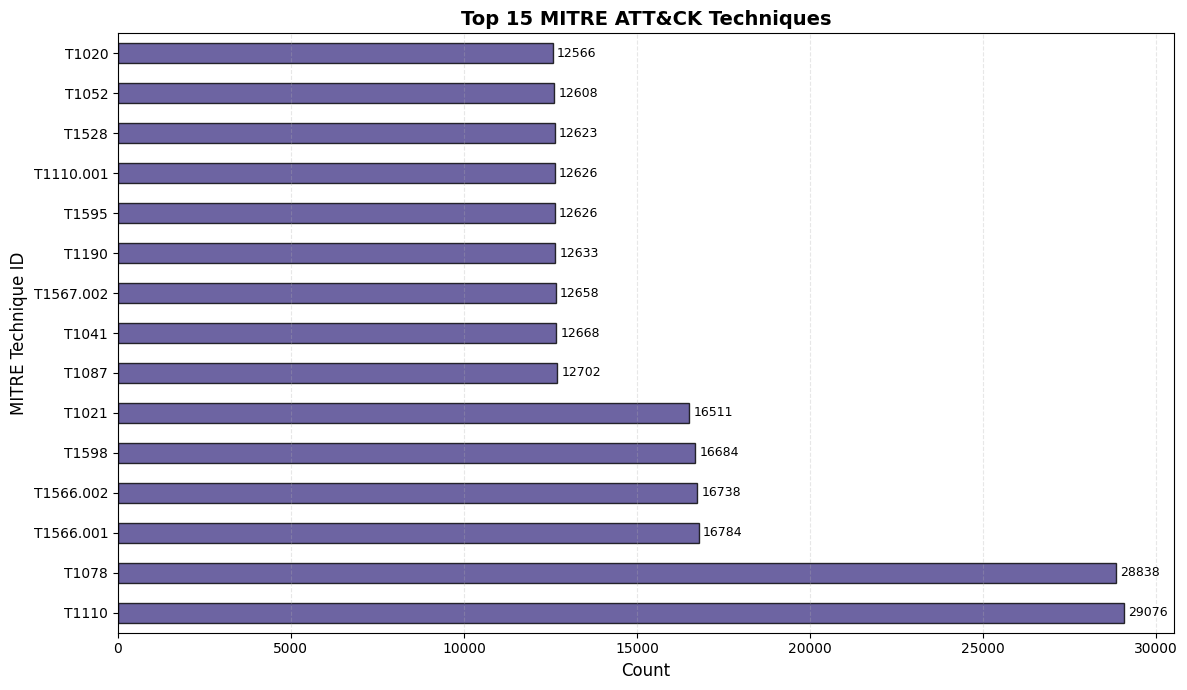



Sample Text Field Previews:
                                   description_short  \
0  Ransomware-like activity on LINUX-DB-01: encry...   
1  Malware detected on WIN10-LAPTOP-02: executing...   
2  Suspicious email to eric.m with fake login lin...   

                             description_user_report  \
0  leo.v flagged that files on LINUX-DB-01 sudden...   
1  karen.b alerted about that WIN10-LAPTOP-02 was...   
2  eric.m reported receiving an email about accou...   

                                           short_log  
0  MALWARE on LINUX-DB-01 from 23.152.109.9 to 8....  
1  MALWARE on WIN10-LAPTOP-02 from 175.227.138.19...  
2  PHISHING on MACBOOK-SEC-01 from 179.246.188.20...  


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("default")
sns.set_palette("husl")

# Event type distribution
print("Event Type Distribution:")
print(df["event_type"].value_counts())
print(f"\nTotal unique event types: {df['event_type'].nunique()}")

# Visualize event type distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
df["event_type"].value_counts().plot(kind="bar", ax=ax1, color='steelblue', alpha=0.8, edgecolor='black')
ax1.set_title("Event Type Distribution", fontsize=14, fontweight='bold')
ax1.set_xlabel("Event Type", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', padding=3, fontsize=9)

# Pie chart
colors = sns.color_palette("Set3", n_colors=df["event_type"].nunique())
df["event_type"].value_counts().plot(kind="pie", ax=ax2, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title("Event Type Proportion", fontsize=14, fontweight='bold')
ax2.set_ylabel("")

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# Severity distribution
print("Severity Level Distribution:")
print(df["severity"].value_counts())
fig, ax = plt.subplots(figsize=(10, 5))
severity_order = ["info", "low", "medium", "high", "critical"]
severity_counts = df["severity"].value_counts().reindex(severity_order, fill_value=0)
colors_severity = ['#2ecc71', '#f39c12', '#e67e22', '#e74c3c', '#c0392b']
bars = severity_counts.plot(kind="bar", ax=ax, color=colors_severity, alpha=0.85, edgecolor='black')
ax.set_title("Severity Level Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Severity", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.grid(axis='y', alpha=0.3, linestyle='--')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# Log source distribution
print("Log Source Distribution:")
print(df["log_source"].value_counts())
fig, ax = plt.subplots(figsize=(12, 6))
df["log_source"].value_counts().plot(kind="barh", ax=ax, color='seagreen', alpha=0.8, edgecolor='black')
ax.set_title("Log Source Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Log Source", fontsize=12)
ax.grid(axis='x', alpha=0.3, linestyle='--')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=9)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# True positive distribution
print("True Positive Label Distribution:")
print(df["is_true_positive"].value_counts())
fig, ax = plt.subplots(figsize=(8, 5))
tp_counts = df["is_true_positive"].value_counts().sort_index()
colors_tp = ['coral', 'steelblue']
tp_counts.plot(kind="bar", ax=ax, color=colors_tp, alpha=0.85, edgecolor='black')
ax.set_title("True Positive vs False Positive Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Label", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(['False Positive (0)', 'True Positive (1)'], rotation=0)
ax.grid(axis='y', alpha=0.3, linestyle='--')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# MITRE technique distribution (top 15)
print("Top 15 MITRE Techniques:")
print(df["mitre_technique"].value_counts().head(15))
fig, ax = plt.subplots(figsize=(12, 7))
df["mitre_technique"].value_counts().head(15).plot(kind="barh", ax=ax, color='darkslateblue', alpha=0.8, edgecolor='black')
ax.set_title("Top 15 MITRE ATT&CK Techniques", fontsize=14, fontweight='bold')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("MITRE Technique ID", fontsize=12)
ax.grid(axis='x', alpha=0.3, linestyle='--')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=9)
plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# Sample text fields
print("Sample Text Field Previews:")
print(df[["description_short", "description_user_report", "short_log"]].head(3))